#  <p style = "font-family:Fantasy" letter-spacing = 17rem><Font color = 'lightblue'> iris Dataset </Font></p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(42)

 Load the Iris dataset.


In [2]:
from sklearn import datasets
iris_data=datasets.load_iris()

In [3]:
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

Perform data exploration.

In [4]:
colnames=['sepal length', 'sepal width', 'petal length', 'petal width', 'iris type'] 
df = pd.read_csv('iris.data', names=colnames)

In [5]:
df.head()

,sepal length,sepal width,petal length,petal width,iris type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.shape

(150, 5)

In [8]:
df.info

<bound method DataFrame.info of      sepal length  sepal width  petal length  petal width       iris type
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

 Check for missing values and handle them if any.

In [9]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
iris type       0
dtype: int64

In [10]:
#df.duplicated().sum()

In [11]:
#df=df.drop_duplicates()

In [12]:
#df.duplicated().sum()

data visualization

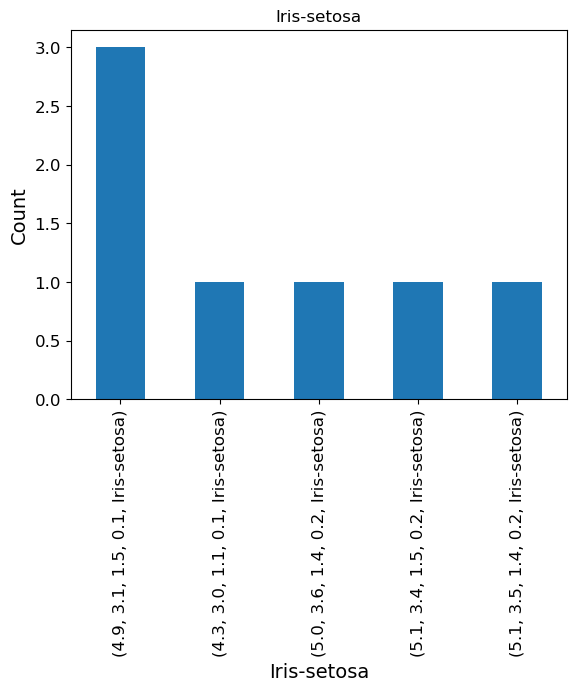

In [13]:
Iriss_etosa_counts = df[df['iris type']=="Iris-setosa"].value_counts()
Iriss_etosa_counts.iloc[:5].plot.bar()
plt.xlabel('Iris-setosa')
plt.ylabel('Count')
plt.title('Iris-setosa')
plt.show()

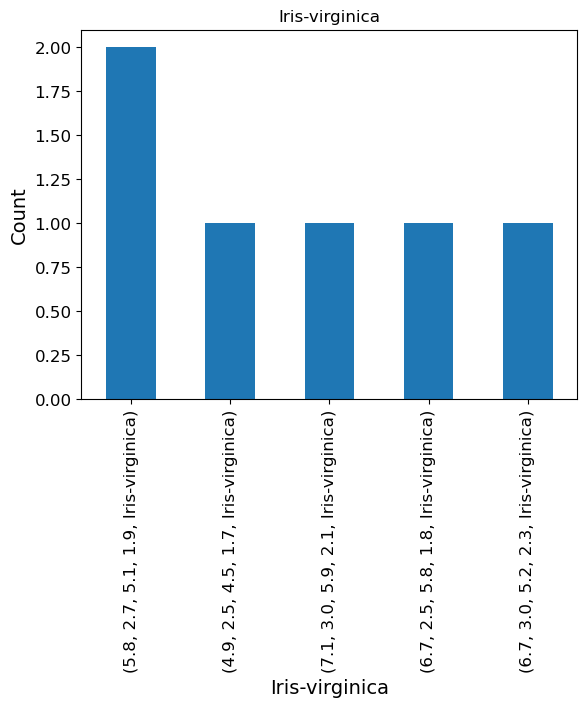

In [14]:
Iriss_virginica_counts = df[df['iris type']=="Iris-virginica"].value_counts()
Iriss_virginica_counts.iloc[:5].plot.bar()
plt.xlabel('Iris-virginica')
plt.ylabel('Count')
plt.title('Iris-virginica')
plt.show()

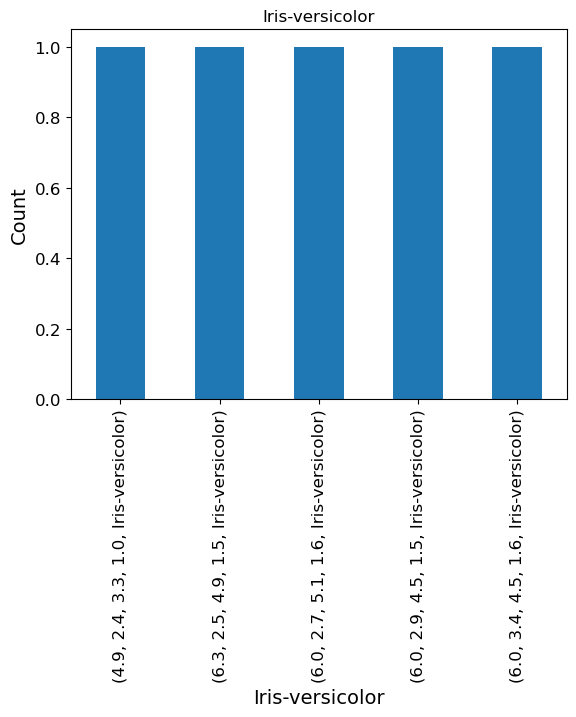

In [15]:
Iriss_versicolor_counts = df[df['iris type']=="Iris-versicolor"].value_counts()
Iriss_versicolor_counts.iloc[:5].plot.bar()
plt.xlabel('Iris-versicolor')
plt.ylabel('Count')
plt.title('Iris-versicolor')
plt.show()

In [16]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

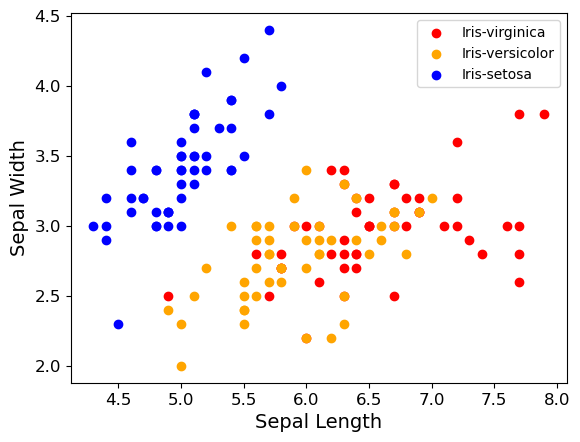

In [17]:
for i in range(3):
    x = df[df['iris type'] == species[i]]
    plt.scatter(x['sepal length'], x['sepal width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

Split the dataset into features and target variables.

In [18]:
x = iris_data.data
y = iris_data.target

In [19]:
#features = ["sepal length", "sepal width", "petal length", "petal width"]
#target = "iris type"

# Split the dataset into features and target variables
#x,y = df.data,df.target
#x, y = df["data"], df["target"]

In [20]:
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [21]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [22]:
df['iris type'].value_counts()

iris type
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Split the dataset into training and testing sets.

In [23]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

 Build a baseline model (e.g., logistic regression or decision tree) using default parameters.

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# model training
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

c:\Users\Lina\miniconda3\envs\t5\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Choose an appropriate evaluation metric based on the problem (classification).

In [25]:
# Calculate accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

 Evaluate the baseline model's performance

In [26]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0
